In [15]:
########################################################
# import packages
import argparse
import json
import pandas as pd
from fredapi import Fred

########################################################

with open("secrets/secrets.json") as file:
    secrets = json.load(file)
    api_key = secrets["fred_api_key"]

observation_start='31/7/2001'

rates = [('DGS1MO', '01-month', 1)
         ,('DGS3MO', '03-month', 3)
         ,('DGS6MO', '06-month', 6)
         ,('DGS1', '01-year', 12)
         ,('DGS2', '02-year', 24)
         ,('DGS3', '03-year', 36)
         ,('DGS5', '05-year', 60)
         ,('DGSS7', '07-year', 84)
         ,('DGS10', '10-year', 120)
         ,('DGS20', '20-year', 240)
         ,('DGS30', '30-year', 360)]

In [6]:
fred = Fred(api_key=api_key)

In [7]:
df = pd.DataFrame(fred.get_series(series_code, observation_start=observation_start).dropna().dropna())/100
df/= 100

In [10]:
df = pd.DataFrame()

for rate in rates:
    series_code = rate[0]
    df_new = .DataFrame(fred.get_series(series_code, observation_start=observation_start).dropna().dropna())/100
    df = pd.merge(df, df_new, left_index=True, right_index=True, how="outer")

SyntaxError: invalid syntax (1822985773.py, line 4)

In [12]:
df

,0
2001-07-31,0.0367
2001-08-01,0.0365
2001-08-02,0.0365
2001-08-03,0.0363
2001-08-06,0.0362
...,...
2022-04-21,0.0050
2022-04-22,0.0046
2022-04-25,0.0040
2022-04-26,0.0038


In [6]:
time_span = pd.Series([1/12,3/12,6/12,1,2,3,5,7,10,20,30])

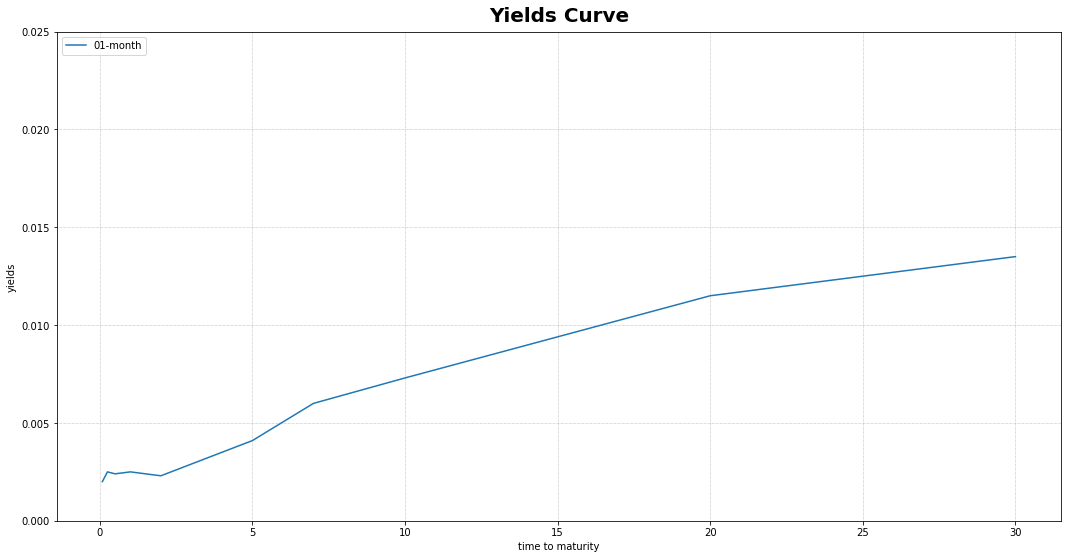

In [8]:
# Build Image
fig = plt.figure(figsize=(18,9))
ax = plt.axes()

# Nominal
plt.plot(time_span,treasury_rates.tail(1).T.values,label='01-month')
# Axis
plt.ylim(0, 0.025)

# Other elements
plt.legend(loc='upper right')
ax.set_title('Yields Curve', fontsize=20, fontweight='bold', verticalalignment='bottom')
ax.set_xlabel('time to maturity')
ax.set_ylabel('yields')
ax.legend(loc='upper left')
ax.grid(linestyle=":", linewidth=0.5, color='gray')